# 2장. 지도 학습

*아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.*

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/intro_ml_with_python_2nd_revised/blob/main/02-supervised-learning.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/intro_ml_with_python_2nd_revised/blob/main/02-supervised-learning.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

In [34]:
!pip3 install koreanize_matplotlib

In [35]:
!pip3 install mglearn

In [36]:
%pip install scikit-learn

In [37]:
import pandas as pd
import numpy as np

In [38]:
import sklearn
import mglearn
from koreanize_matplotlib import koreanize_matplotlib
import matplotlib

## 2.1 분류와 회귀
## 2.2 일반화, 과대적합, 과소적합
### 2.2.1 모델 복잡도와 데이터셋 사이즈의 관계

## 2.3 지도 학습 알고리즘

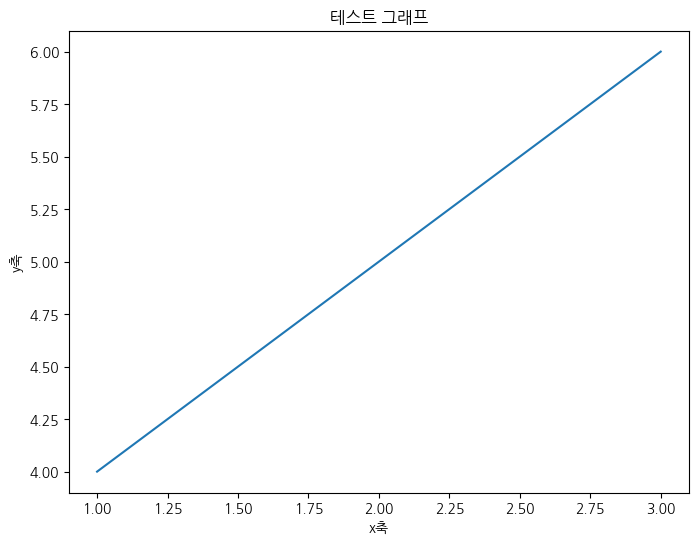

In [39]:
import matplotlib.pyplot as plt
#import matplotlib.font_manager as fm

# 폰트 설정
#plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family='NanumGothic')
# 테스트
plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("테스트 그래프")
plt.xlabel("x축")
plt.ylabel("y축")
plt.show()


X.shape: (26, 2)


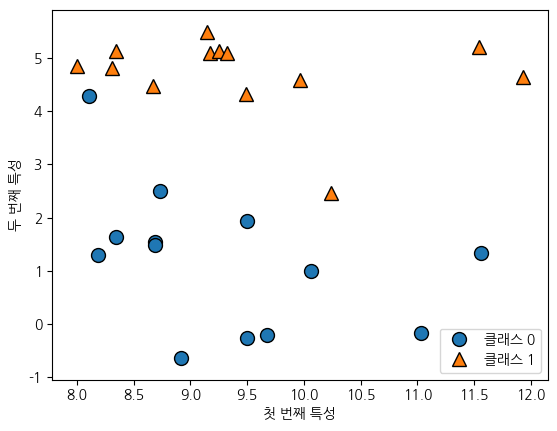

In [40]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
# X의 첫 번째와 두 번째 특성을 기준으로 산점도를 그립니다.
# 클래스(y)가 0과 1인 데이터를 서로 다른 색상/모양으로 구분해 시각화합니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)
plt.show() # 책에는 없음

In [41]:
y.shape

(26,)

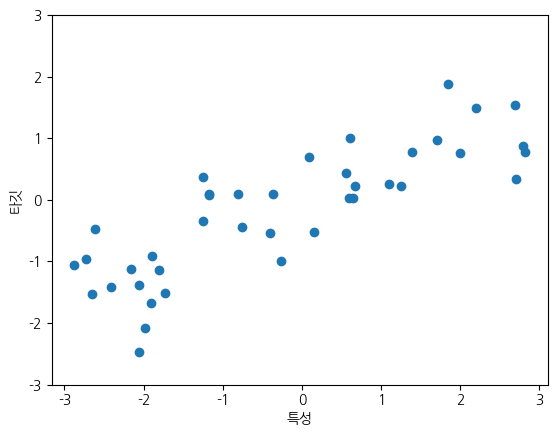

In [42]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")
plt.show() # 책에는 없음

In [43]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [44]:
y[:5]

array([-0.44822073,  0.33122576,  0.77932073,  0.03497884, -1.38773632])

In [45]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(type(cancer))
print("cancer.keys():\n", cancer.keys())

<class 'sklearn.utils._bunch.Bunch'>
cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [46]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [47]:
print("클래스별 샘플 갯수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 갯수:
 {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [48]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Boston Housing 원본 파일은 다음과 같은 비정형 구조를 가집니다:

**한 샘플(주택)**의 데이터가 두 줄에 걸쳐 저장됨

1줄: 12개 특성

2줄: 2개 특성 + 목표값(타깃)

In [49]:
# 보스턴 주택 데이터셋이 1.2 버전에서 삭제되므로 다음과 같이 코드를 수정합니다.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
##   # 짝수 번째 행 (0, 2, 4, ...) → 12개 특성
##   # 홀수 번째 행 (1, 3, 5, ...) → 앞 2개 특성
target = raw_df.values[1::2, 2] # # 홀수 번째 행의 세 번째 값 → 타깃 값
print("데이터의 형태:", data.shape)

데이터의 형태: (506, 13)


In [50]:
## 특성 공학으로 유도된 데이터세트: 특성이 13개에서 104개로 확장됨 > 4장 특성공학에 다룸, 교재 62페이지 설명
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


### 2.3.2 k-최근접 이웃
#### k-최근접 이웃 분류

K-최근접 이웃(K-Nearest Neighbors, K-NN)은 **지도학습(Supervised Learning)**의 대표적인 알고리즘.
- "가까운 이웃들의 레이블을 참고하여 새로운 데이터를 예측"


개념 요약: 
- 어떤 새로운 데이터가 주어졌을 때,

- 훈련 데이터 중 가장 가까운 K개의 이웃을 찾고,

- 그 이웃들의 레이블로부터 예측을 수행

- 분류 문제: K개 중 가장 많은 클래스를 선택 (다수결)

- 회귀 문제: K개 값의 평균을 예측값으로 사용




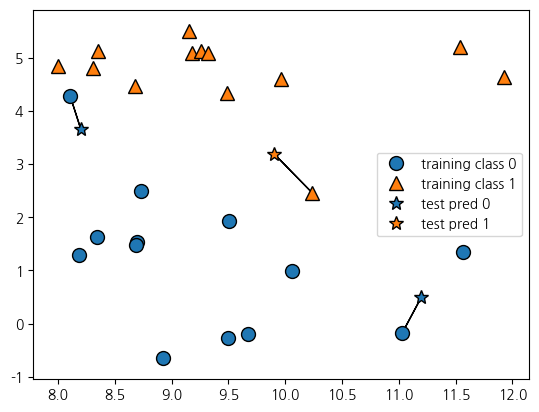

In [51]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

- 다수결로 분류

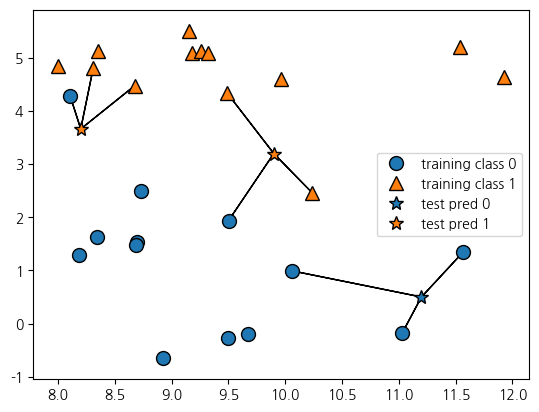

In [52]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [53]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge() # 교재 58 페이지 - 이진 분류 데이터세트

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [54]:
X.shape

(26, 2)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [56]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [58]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


#### KNeighborsClassifier 분석

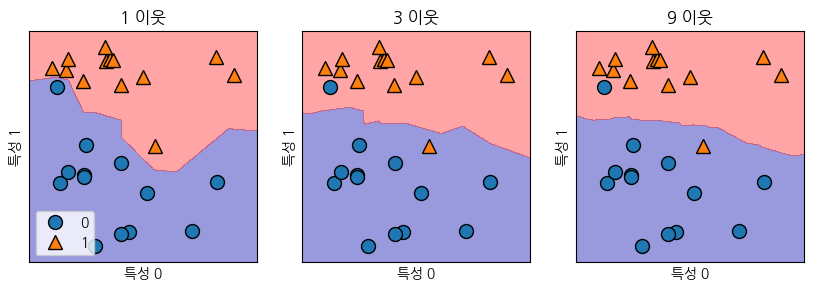

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)
plt.show() # 책에는 없음

9 이웃: 모델이 단순
1 이웃: 모델이 복잡

실제 데이터를 사용한 분류 분석

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 1420, in _execute

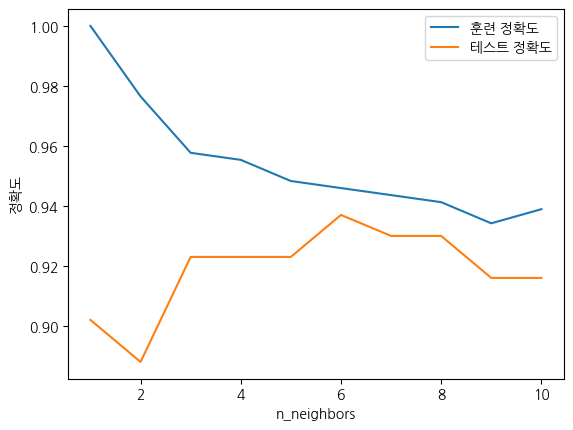

In [60]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # 교재 60 페이지 
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show() # 책에는 없음

#### k-최근접 이웃 회귀

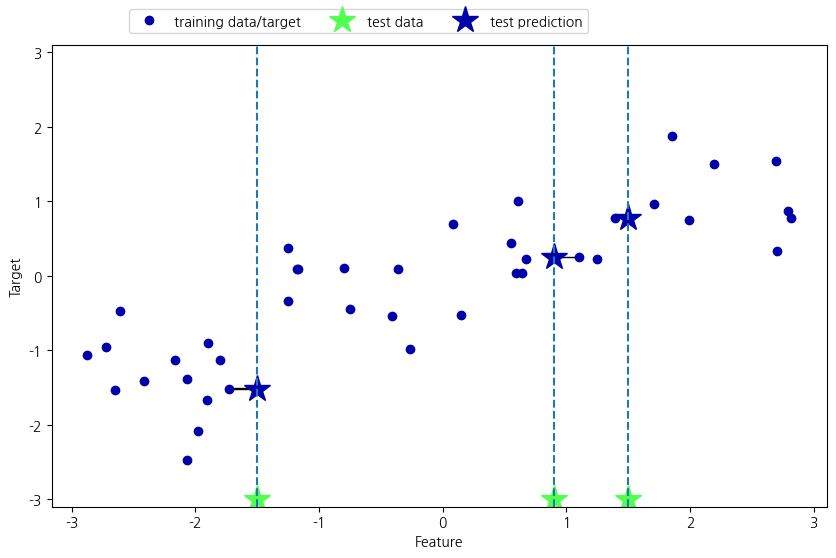

In [61]:
mglearn.plots.plot_knn_regression(n_neighbors=1) #교재 59페이지

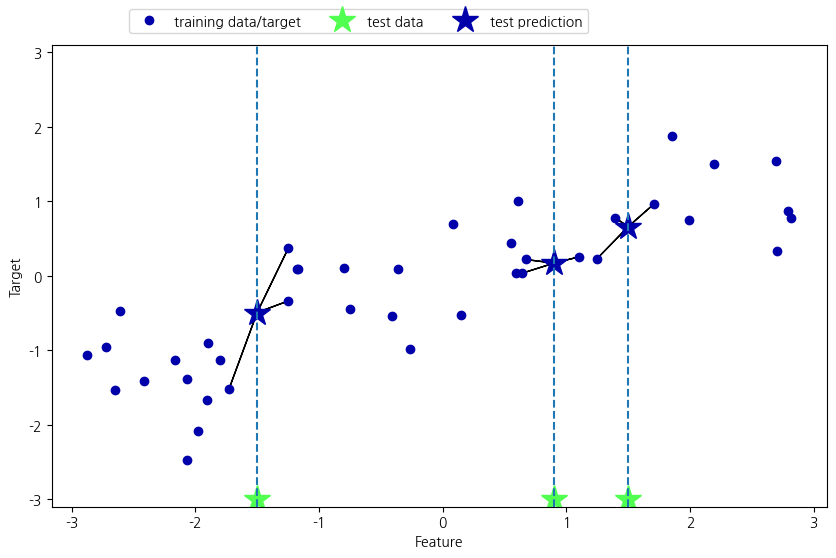

In [62]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [63]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [64]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


구글링: 결정 계수의 의미와 계산 방법, 여울, 20.8.9
    R square = 1 - SSR/SST (1- 설명 안되는 분산/총분산)

In [65]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


#### KNeighborsRegressor 분석

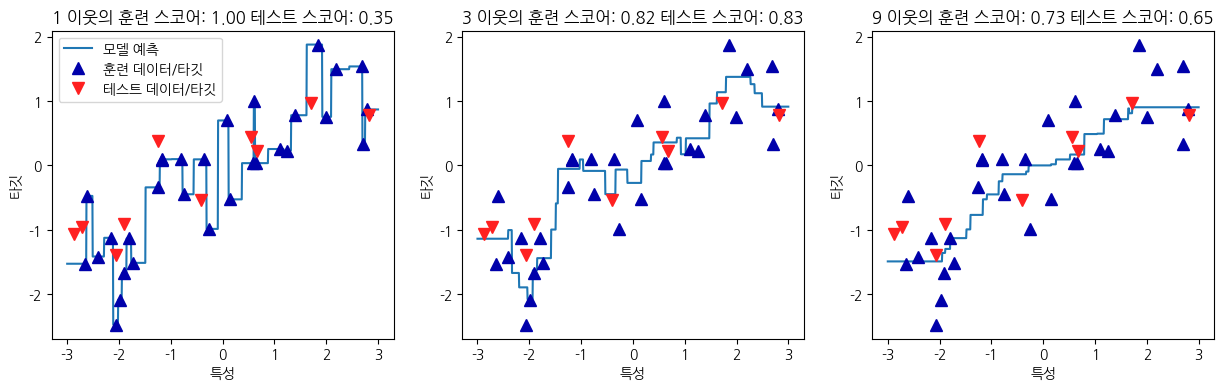

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show() # 책에는 없음

#### 장단점과 매개변수

### 2.3.3. 선형 모델
#### 회귀의 선형 모델

벡터 내적:product
a = (a1,a2), b = (b1,b2)
a.b = a1b1 + a2b2

파이썬 np.dor(w,x)이 벡터 내적 조건: w,x가 모두 1차원이거나 w가 (n,1)이고 x가 (n,)일 때 numpy가 자동 변환
- w의 전치 w.T = (1,n)으로 자동 변환

w[0]: 0.393906  b: -0.031804


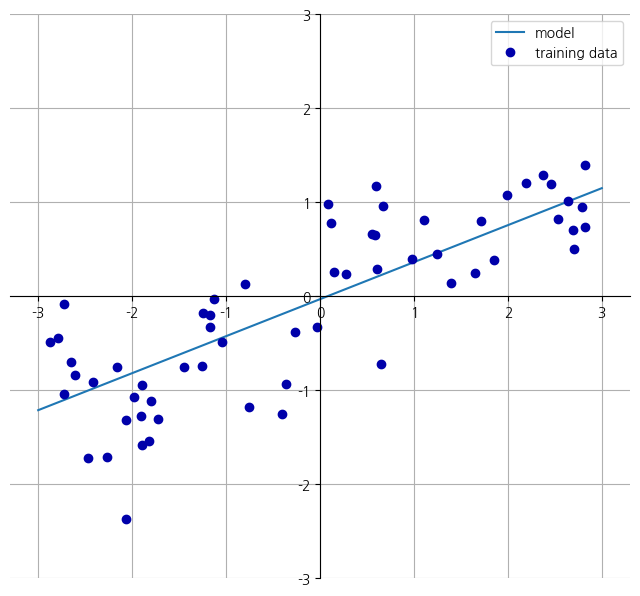

In [67]:
mglearn.plots.plot_linear_regression_wave()

[딥러닝] 선형회귀 Linear Regression - 최소제곱법, 평균제곱오차, 경사하강법, 멍개, 21.2.20, https://m.blog.naver.com/pjt3591oo/222250225034

#### 선형 회귀(최소제곱법)
- y = wx + b # 학습으로 w,b를 찾는다 

In [68]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [69]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


결정계수(R^2)의 이해, 노마프분석가, 22.3.8, https://diseny.tistory.com/entry/%EA%B2%B0%EC%A0%95%EA%B3%84%EC%88%98R2%EC%9D%98-%EC%9D%B4%ED%95%B4?category=906035

In [70]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train))) # 과소적합 - 특성 1개
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test))) #R-square

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [71]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [72]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train))) #과대 적합 - 유도된 특성 104개
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


#### 리지 회귀

ridge:  산마루, 산등성이 - elevated body part or structure
- 해석: 복잡한 골짜기를 숨긴다
- ridge는 최적화 함수의 형태에서 유래한 용어
 > 제약조건 sum(w^2) < t를 만족하도록 최적화면 등고선이 원 또는 타원형 형태의 구릉 지형(ridge-like shape) 형성

In [73]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


[정규화(regulation)와 Ridge Regression,yuns_u·2021년 8월 11일, ](https://velog.io/@yuns_u/Ridge-Regression)
- regulate: to control something, by making it work in a particular way
- 규제: 과대적합이 되지 않도록 모델을 강제로 제한 >wi을 0에 가깝게 만든다 >> L2 규제

In [74]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train) #비용함수 = sigma(yi-yi^)**2 + alpha *sigma(wi)**2
##alpha가 크면 wi는 더 0에 가까워져야 한다. > feature 숫자를 줄이는 효과를 갖는다
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [75]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train) # alpha가 작으면 wi는 커지고 > 모델이 복잡해지고
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


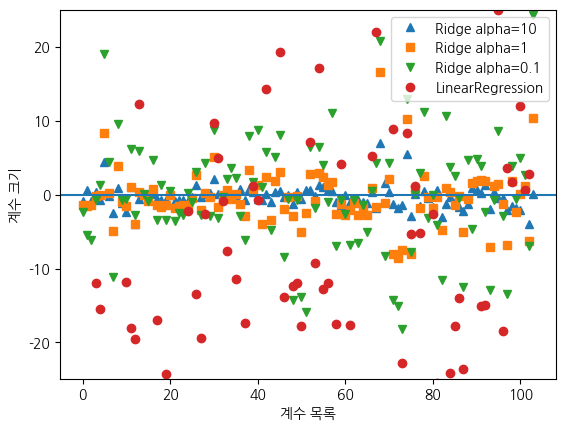

In [76]:
# 알파 값에 따라 각 가중치 값: y축, x축은 coef목록 > 각 특성을 말한다 

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기") # eocf 크기는 가중치 값을 말함
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show() # 책에는 없음

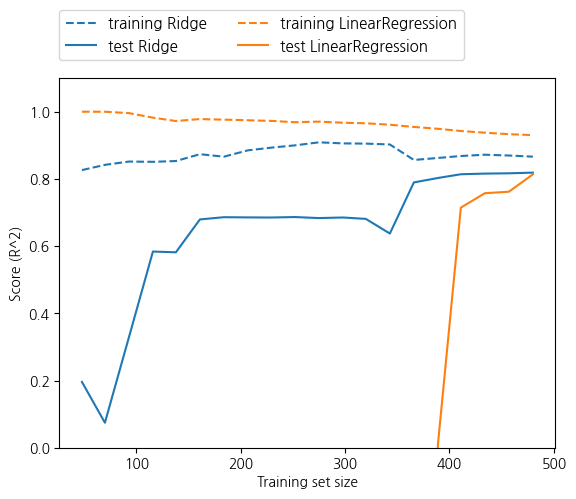

In [77]:
mglearn.plots.plot_ridge_n_samples()

#### 라소

선형회귀(linear regression), 라쏘(LASSO), 리지(Ridge),땅어 2020. 7. 7. 17:27, https://otugi.tistory.com/127

In [78]:
# 비용함수 = 1/n * sigma(yi-yi^)**2 + alpha * sigma|wi|
## wi를 0으로 만든다 > L1 규제 > 특성 선택
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train) #default로서 알파 = 1 사용
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0)) # 104개 특성 중에서 4개만 사용 

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [79]:
# max_iter 기본 값을 증가시키지 않으면 max_iter 값을 Null이라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train) # 알파값이 작아지니 많은 특성 사용
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0)) # 33개 특성을 사용하므로 모델 복잡도 증가

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [80]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train) # 알파값을 매우 적게 > 과대 적합
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


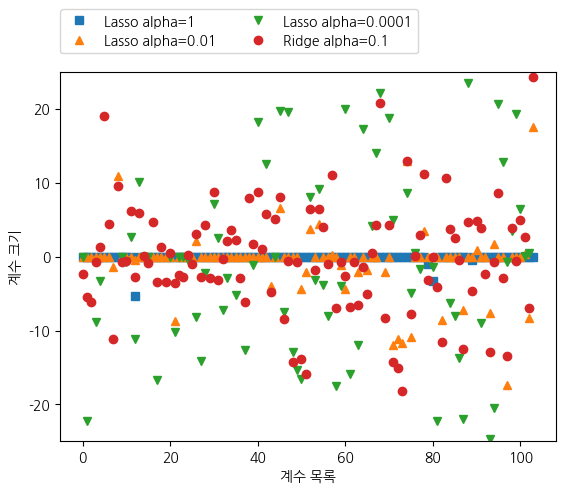

In [81]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1") # 특성 대부분 = 0
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001") # 0이 아닌 특성 증가

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.show() # 책에는 없음

#### QuantileRegressor

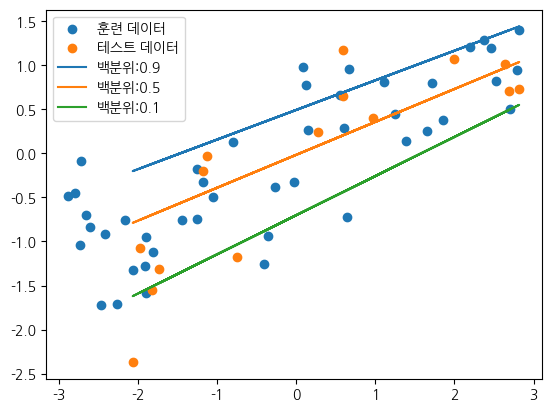

In [82]:
from sklearn.linear_model import QuantileRegressor

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pred_up = QuantileRegressor(quantile=0.9, alpha=0.01).fit(X_train, y_train).predict(X_test)
pred_med = QuantileRegressor(quantile=0.5, alpha=0.01).fit(X_train, y_train).predict(X_test)
pred_low = QuantileRegressor(quantile=0.1, alpha=0.01).fit(X_train, y_train).predict(X_test)

plt.scatter(X_train, y_train, label='훈련 데이터')
plt.scatter(X_test, y_test, label='테스트 데이터')
plt.plot(X_test, pred_up, label='백분위:0.9')
plt.plot(X_test, pred_med, label='백분위:0.5')
plt.plot(X_test, pred_low, label='백분위:0.1')
plt.legend()
plt.show()

#### 분류용 선형 모델

로지스틱회귀(Logistic Regression) 쉽게 이해하기, 논표범, 21.8.7., https://dine.tistory.com/75

인공지능, logit(로짓), sigmoid의 관계, 담쏙, 21.2.2, https://m.blog.naver.com/je_un/222229440878

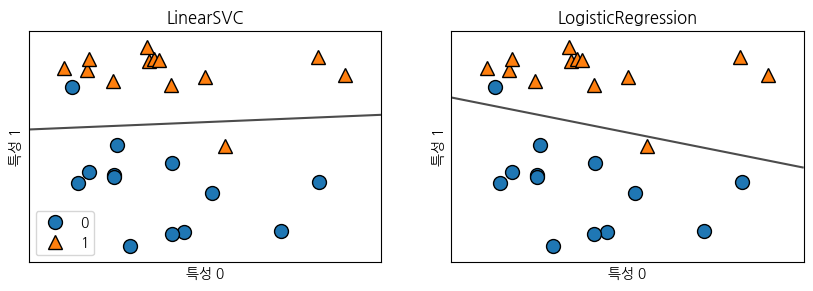

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show() # 책에는 없음

C: inverse of regularization strength, 규제의 강도 = 1/L2, L2 = alpha *sigma(wi**2)

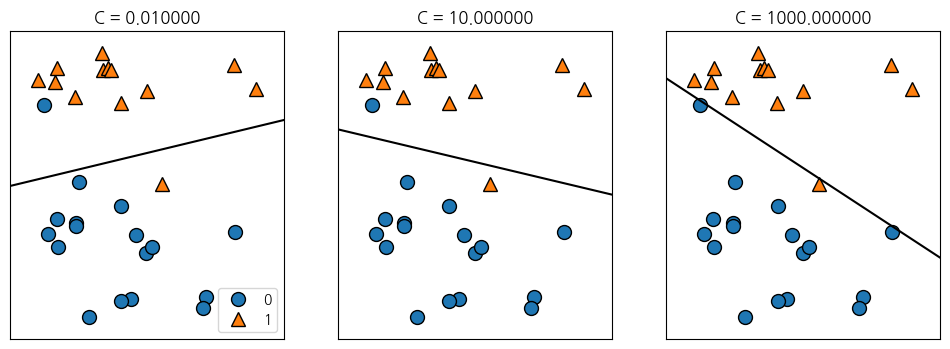

In [84]:
mglearn.plots.plot_linear_svc_regularization()

In [85]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # default 값 C = 1 > 과소 적합
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [86]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train) # 과대 적합 - 복잡도 증가 
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train) # 과소적합
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


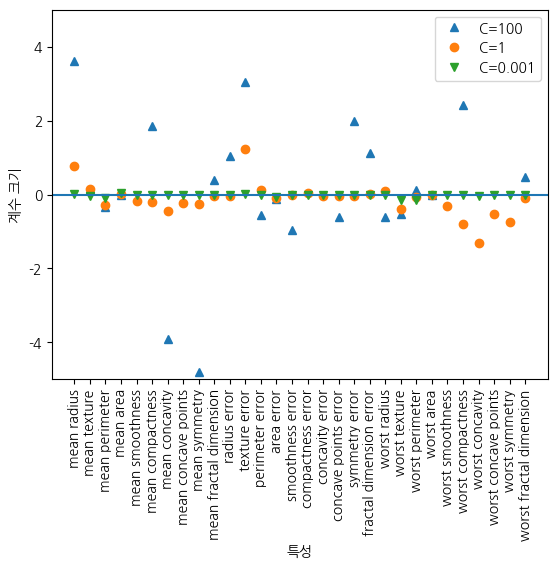

In [88]:
plt.plot(logreg100.coef_.T, '^', label="C=100") # 과대 적합 - 규제 강도가 높다 > L2가 크다 > wi는 0으로
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001") # 과소 적합 - 규제 강도가 낮다 > wi를 사용 > 데이터 포인트에 맞출려고 한다 
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성") # 변수
plt.ylabel("계수 크기") # 가중치 값
plt.legend()
plt.show() # 책에는 없음

사이킷런 0.22 버전부터는 `LogisticRegression`의 `solver` 매개변수 기본값이 `lbfgs`로 변경되었습니다. `lbfgs`는 L1 규제를 지원하지 않습니다. 따라서 `solver` 매개변수를 `liblinear`로 지정합니다.

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


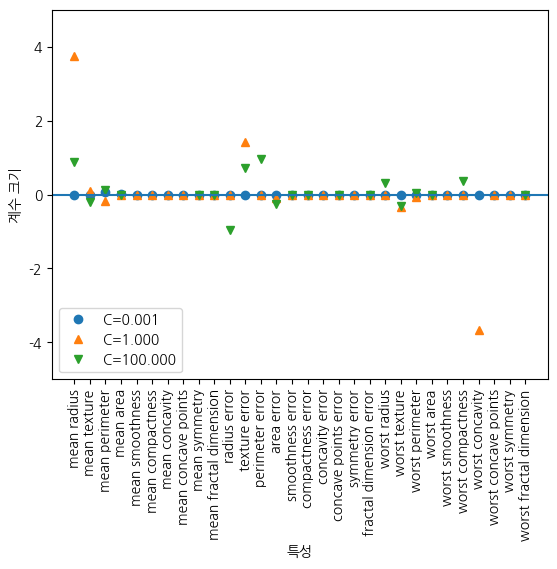

In [89]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show() # 책에는 없음

#### 다중 클래스 분류용 선형 모델

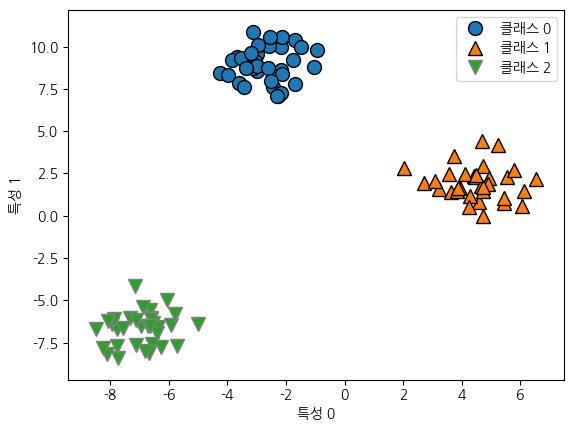

In [90]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
# x1: x축 값 (1차원 배열)
# x2: y축 값 (1차원 배열)
# y: 클래스 레이블 (0, 1, 2 같은 정수 클래스)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])
plt.show() # 책에는 없음

In [91]:
# 선형 서포트 백터 머신(SVM)
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


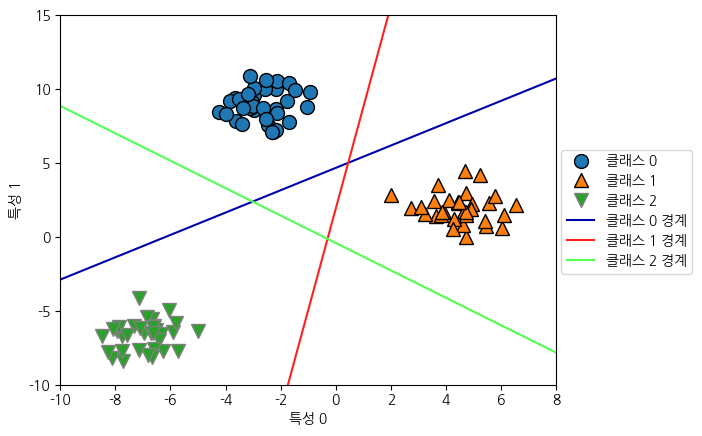

In [92]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.show() # 책에는 없음

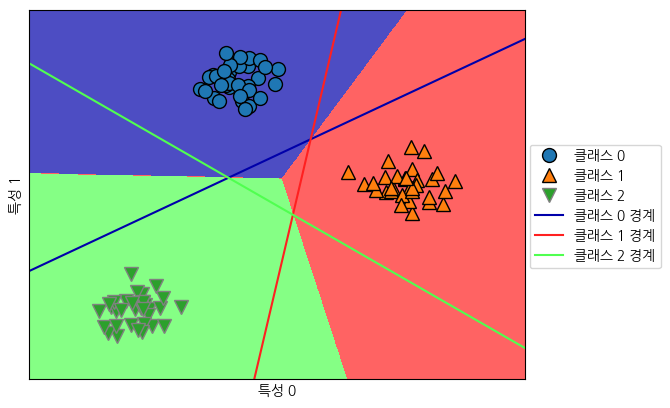

In [93]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

#### 장단점과 매개변수

In [94]:
# 한 줄에서 모델의 객체를 생성과 학습을 한번에 실행합니다
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

In [95]:
logreg = LogisticRegression(max_iter=5000)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [96]:
# max_iter : 반복 최적화 알고리즘의 최대 반복 횟수
y_pred = LogisticRegression(max_iter=5000).fit(X_train, y_train).predict(X_test)

#### SGDClassifier와 SDGRegressor

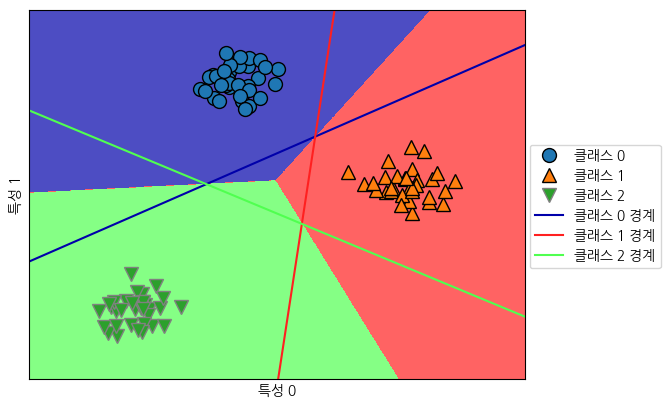

In [97]:
from sklearn.linear_model import SGDClassifier

sgd_c = SGDClassifier(alpha=0.01, learning_rate='adaptive',
                      eta0=0.1, random_state=42, n_jobs=-1)
sgd_c.fit(X, y)

mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

In [98]:
from sklearn.linear_model import SGDRegressor

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sgd_r = SGDRegressor(learning_rate='adaptive', eta0=0.1, random_state=42)
sgd_r.fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(sgd_r.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(sgd_r.score(X_test, y_test)))

훈련 세트 점수: 0.91
테스트 세트 점수: 0.77


### 2.3.4 나이브 베이즈 분류기

In [99]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [100]:
counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1 이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n", counts)

특성 카운트:
 {np.int64(0): array([0, 1, 0, 2]), np.int64(1): array([2, 0, 2, 1])}


#### 장단점과 매개변수

### 2.3.5 결정 트리

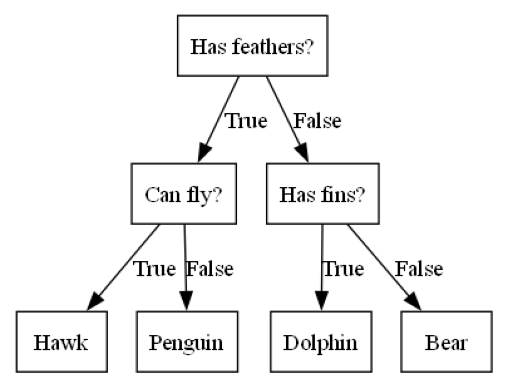

In [101]:
mglearn.plots.plot_animal_tree()

#### 결정 트리 만들기

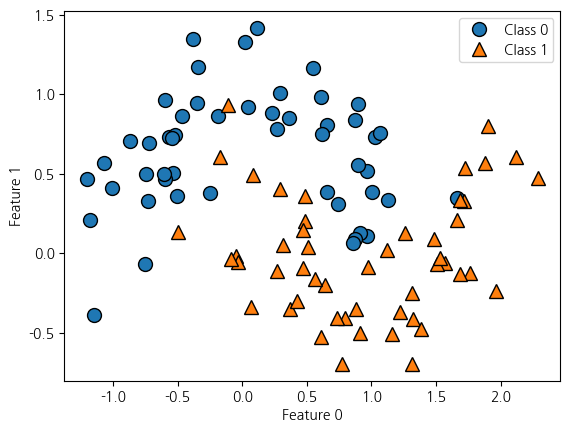

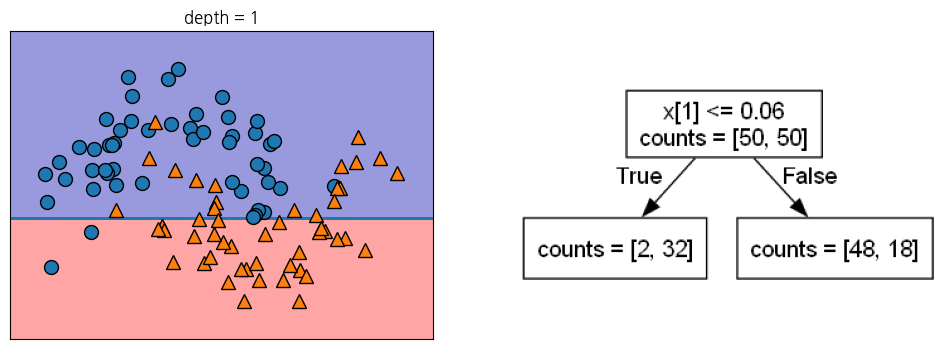

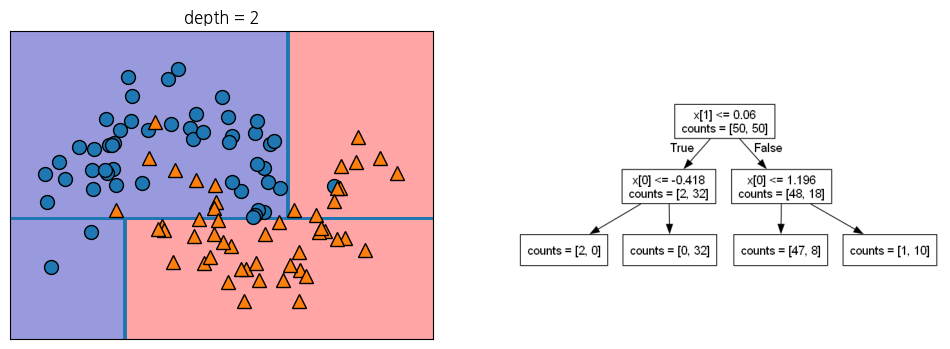

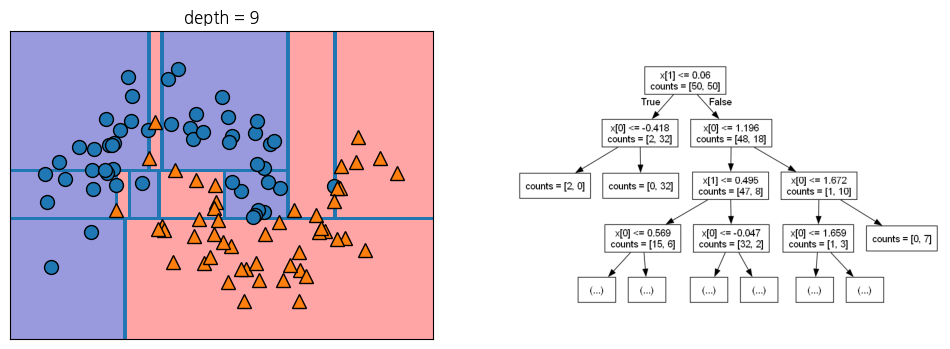

In [102]:
mglearn.plots.plot_tree_progressive()

#### 결정 트리의 복잡도 제어하기

In [103]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [104]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


#### 결정 트리 분석

In [105]:
%pip install graphviz

In [106]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [107]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 197: illegal multibyte sequence

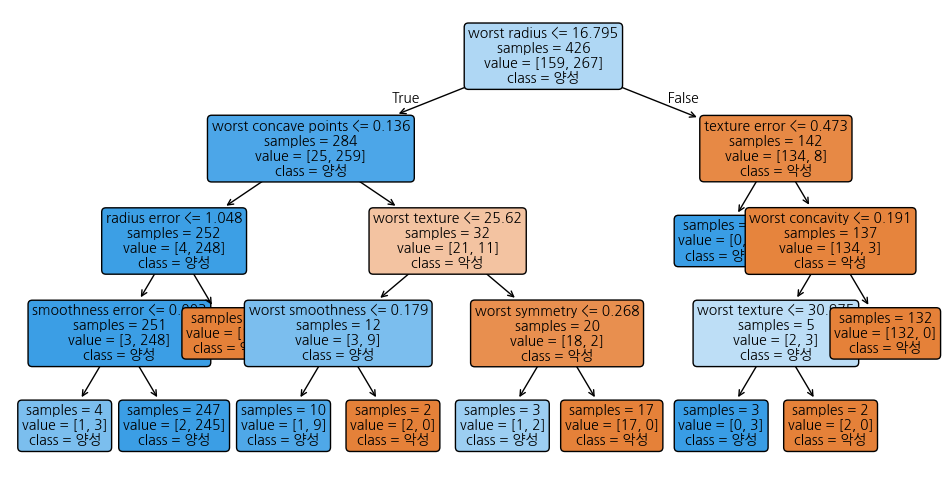

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(tree, class_names=["악성", "양성"],
          feature_names=cancer.feature_names.tolist(),
          impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()

#### 트리의 특성 중요도

In [ ]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


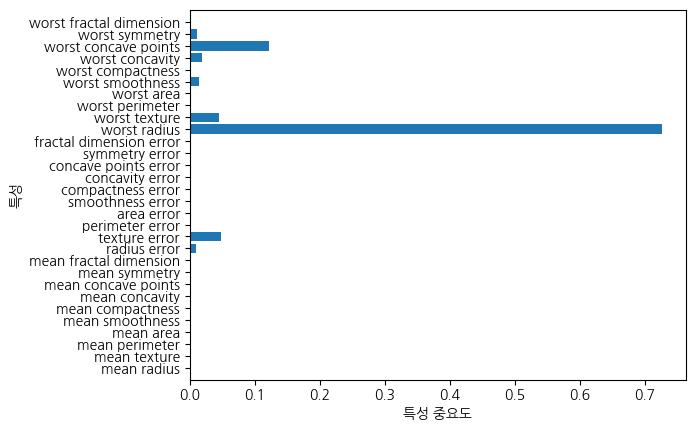

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

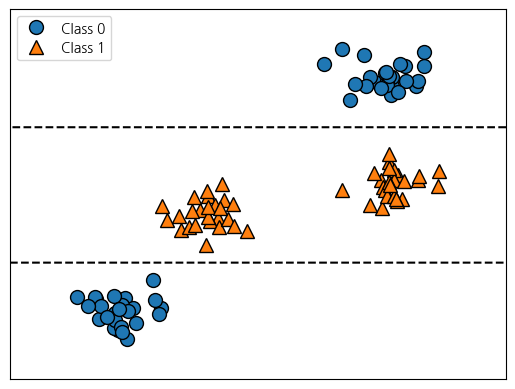

In [ ]:
mglearn.plots.plot_tree_not_monotone()

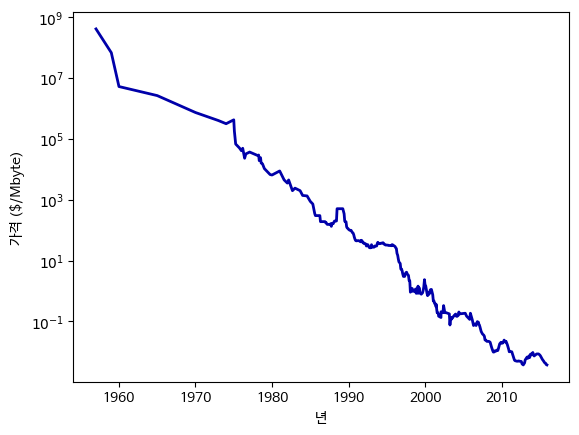

In [ ]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "DejaVu Sans") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show() # 책에는 없음

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

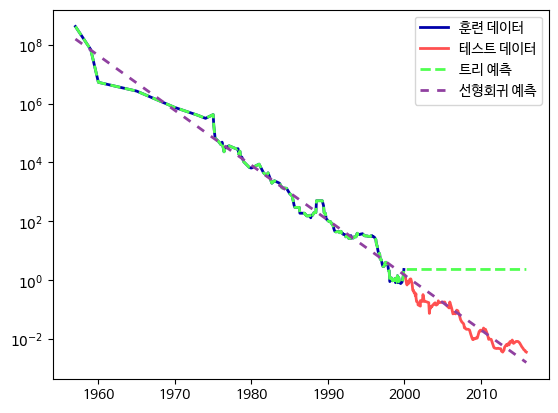

In [ ]:
plt.yticks(fontname = "DejaVu Sans") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()
plt.show() # 책에는 없음

#### 장단점과 매개변수

#### 판다스 데이터 프레임 연동

In [ ]:
tree.fit(data_train[['date']], y_train)

print('특성 개수:', tree.n_features_in_)
print('특성 이름:', tree.feature_names_in_)

NameError: name 'data_train' is not defined

### 2.3.6 결정 트리의 앙상블
#### 랜덤 포레스트
##### 랜덤 포레스트 구축
##### 랜덤 포레스트 분석

앙상불 - ensemble : 전체적인 어울림이나 통일
- 결정트리에서  bootstrap은 통계학적인 resample 방법중의 하나 > 주어진 데이터세트에서 복원 추출을 통해 샘플을 형성
> n개의 data point이면 n개를 추출

bootstrap sampling(bootstrapping, 부트스트랩  샘플링) 쉽게 이해하기, 모던네이쳐, 20.11.3, https://modern-manual.tistory.com/entry/Bootstrap-sampling-Bootstrapping-%EB%B6%80%ED%8A%B8%EC%8A%A4%ED%8A%B8%EB%9E%A9-%EC%83%98%ED%94%8C%EB%A7%81-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0

Bootstrap: Boot 장화, strap 끈
bootstrapping: 자기 스스로 하는, 자력으로 성공하다 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

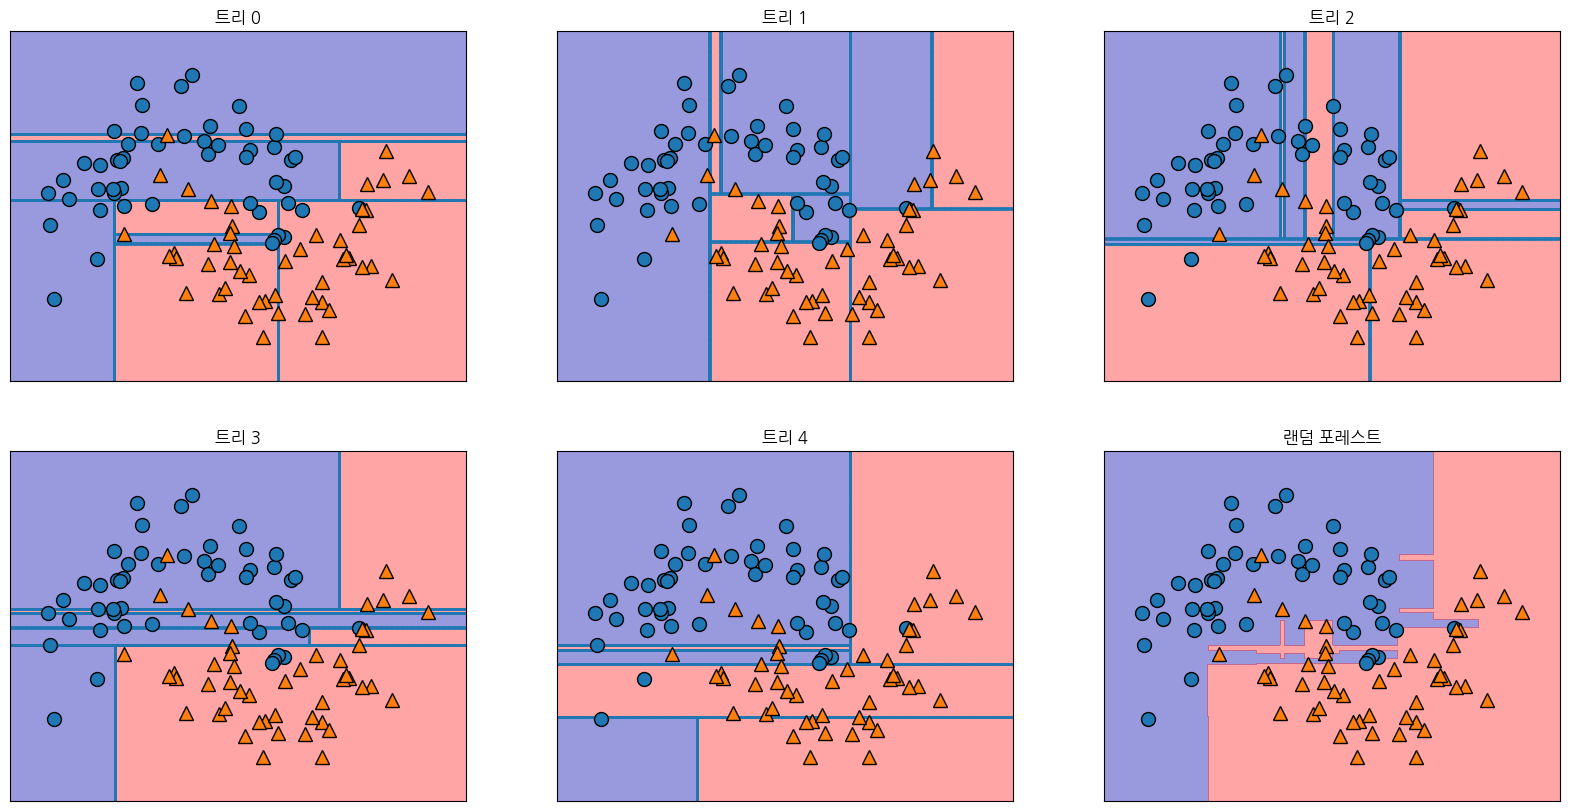

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show() # 책에는 없음

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


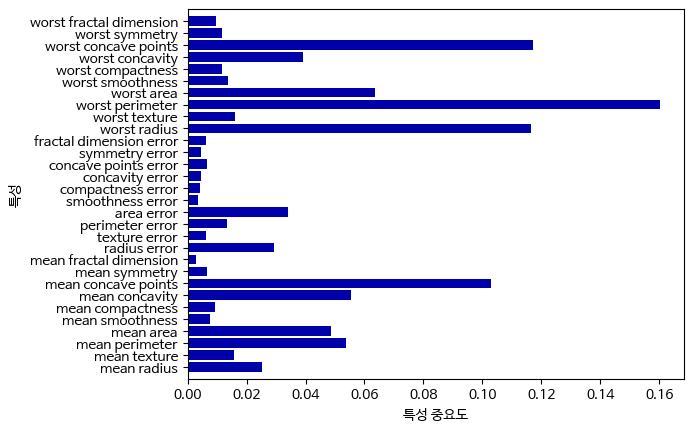

In [ ]:
plot_feature_importances_cancer(forest)

##### 장단점과 매개변수

#### 그래디언트 부스팅 회귀 트리

gradient boosting: 이전 모델의 오차를 보정하는 새로운 모델을 반복적으로 구성
- 손실함수 최소화하기 위한 경사하강법 사용
- 계산된 그래디언트를 손실함수가 최소화하는 방향으로 모델을 학습 > 잔차가 가장 줄어드는 분기점을 택해 분기한다
- 그래디언트를 사용하여 트리의 분할 기준을 결정
- 손실함수를 최소화하는 방향으로 트리를 학습
- XGBoost등으로 구현

그라디언트 부스팅 (Gradient Boosting), 박경아, 23.5.22, https://brunch.co.kr/@parkkyunga/96
- boosting : 신장시키다 부양책 > 약한 모델을 여러번 순차적으로 적용해 강한 모델을 만들어 나가는 것


머신러닝 - 15. 그레디언트 부스트(Gradient Boost), Baek Kyun Shin 2019. 10. 23. 23:14,https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-15-Gradient-Boost

** 배깅과 부스팅 차이
- 배깅(Bagging, Bootstrap Aggregating): bootstrap: 데이터셋에서 여러 중복 샘플 집합을 생성 → 각각 독립적인 모델 훈련 → 결과 평균 또는 투표(aggregating) > Random forest
 > bagging은 bootstrap + aggregating 합성어

- 부스팅: 이전 모델의 오류를 보완하는 방식으로 순차 학습,오류에 집중하여 점점 더 잘 맞추도록 개선, 첫 모델이 틀린 샘플에 가중치를 부여 → 다음 모델이 그 샘플에 더 집중 → 최종 예측은 가중 합산 > XGBoost(Extreme Gradient), LightGBM

boost 단어 뜻: 밀어올리다, 증가시키다, 강화하다
- Boost (in computing / machine learning)
→ 어떤 시스템이나 성능을 향상시키거나 개선하는 기법
→ 예: 그래디언트 부스팅은 성능을 점진적으로 향상시키는 모델

머신러닝에서의 "Boosting"은:

- 여러 개의 **약한 학습기(weak learners)**를 결합하여 **강한 학습기(strong learner)**를 만들어 성능을 점점 밀어올리는 알고리즘

- "Boost"는 단어 그대로 모델의 정확도나 예측력을 계속 밀어올리는 과정

Bagging 특징:
- 여러 개의 모델(예: 결정 트리)을 학습시킴

- 각 모델은 원본 데이터에서 부트스트랩 샘플로 학습

- 예측 결과를 평균 또는 다수결로 통합

- 모델 간 편향(bias)은 그대로지만 분산(variance)은 감소됨

- 과적합(overfitting)을 줄이는 효과가 있음

Random Forest는 Bagging + 랜덤한 특성 선택을 결합한 방식
- Random Forest 특징:
1) 기본적으로 여러 개의 결정 트리를 사용하는 Bagging 구조

2) 각 트리를 만들 때:

  -- 데이터 샘플을 부트스트랩 방식으로 뽑음

  -- **특성(feature)**도 무작위로 일부만 선택하여 분할 기준을 찾음

- 각 트리는 서로 독립적이고, 결과는 다수결(분류) 또는 평균(회귀)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


그래디언트 부스팅은?
- 예측 모델을 점진적으로 향상시키기 위해 약한 모델(예: 결정 트리)을 순차적으로 추가하는 방식

- 각 단계에서 이전 모델이 만든 **오차(잔차, residual)**를 줄이기 위해 새로운 모델을 학습
 > 잔차에 대한 손실 함수의 그래디언트 방향으로 새로운 모델을 만들어 보정.

 > 즉, 각 모델은 손실 함수의 음의 그래디언트 방향을 따라 오차를 줄이도록 학습.

그래디언트 부스팅
- 처음엔 기본 모델로 예측 (예: 모든 값의 평균)

- 예측이 틀린 방향을 보고 "얼마나 틀렸는지" = 잔차를 계산

- 그 잔차를 **가장 잘 설명할 수 있는 작은 결정 트리(약한 모델)**를 학습

- 그 트리의 예측을 기존 모델에 더해서 보정

- 이렇게 계속 반복하여 오차를 줄여감 → 경사 하강법과 같은 방식

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


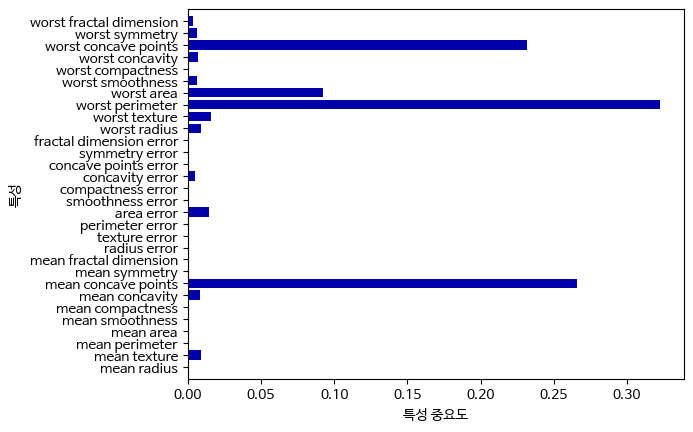

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

##### 장단점과 매개변수

### 2.3.8 커널 서포트 벡터 머신
#### 선형 모델과 비선형 특성

19. 서포트 벡터 머신(support vector machine)에 대해서 알아보자, 부자꽁냥이, 22.5.16, https://zephyrus1111.tistory.com/211

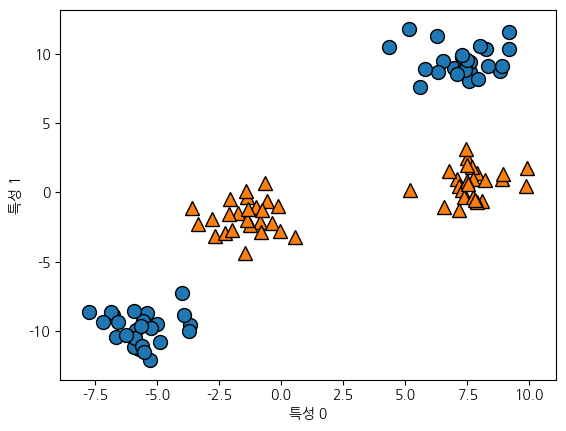

In [ ]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

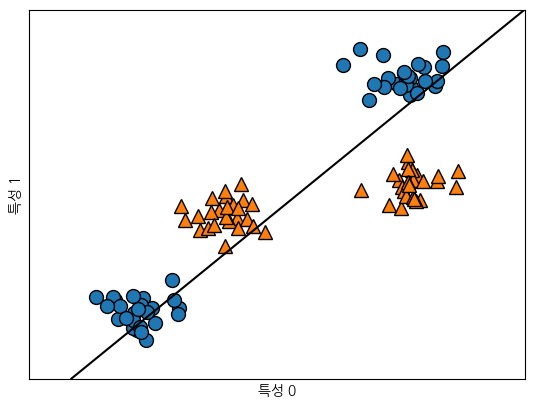

In [ ]:
from sklearn.svm import LinearSVC # 분류를 위한 선형 모델
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

In [ ]:
X[:5]

array([[-1.72161036, -1.48033142],
       [-3.6573384 , -9.5482383 ],
       [ 7.0778163 ,  0.99508772],
       [-1.36579859, -0.3148625 ],
       [-2.66521206, -3.12591651]])

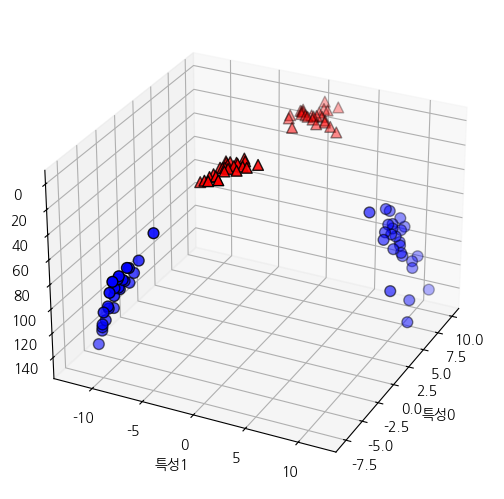

In [ ]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2]) # x1, x2, x2**2

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
if matplotlib.__version__ >= '3.4':
    # Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4 버전에서 deprecated 되었습니다.
    # 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고 figure.add_axes(ax)로 직접 추가하세요.
    ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
plt.show() # 책에는 없음

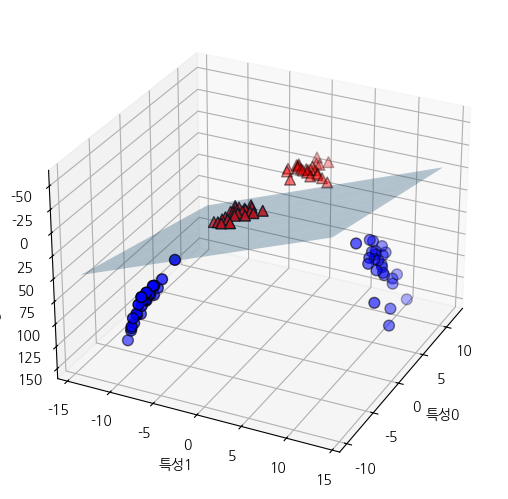

In [ ]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
if matplotlib.__version__ >= '3.4':
    # Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4 버전에서 deprecated됩니다.
    # 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고 figure.add_axes(ax)로 직접 추가하세요.
    ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
plt.show() # 책에는 없음

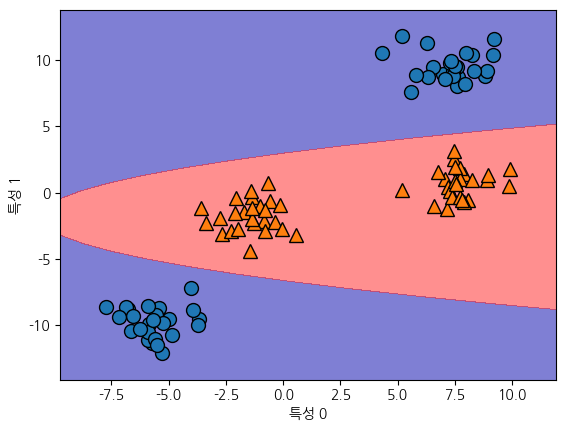

In [ ]:
# 2차원에 투영 - 실행 결과만 보고 이해하는 수준으로 
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

#### 커널 기법
#### SVM 이해하기

1. SVM이란?
- 서포트 백터 머신(SVM)은 분류(Classification)와 회귀(Regression) 문제를 해결하는 지도학습 알고리즘
- 주로 이진 분류(bianary classification) 문제에 강력하며, 고차원 데이터에도 잘 작동함

2. SVM의 핵심 아이디어
"클래스를 나누는 가장 좋은 경계르 찾자!"
- 데이터를 나누는 결정 경계(Decision Boundary) 중에서 두 클래스와의 최소 거리가 가장 먼 경계선을 찾음 -> 마진(Margin)
- SVM은 마진을 최대화하는 결정 경계를 찾는 것이 핵심

3. 주요 개념

        ✅ 마진(Margin)
    - 결정 경계에서 **서포트 벡터(support vector)**까지의 거리
    - 이 거리를 최대화하려고 함

    ✅ 서포트 벡터(Support Vectors)
    - 결정 경계를 **가장 가까이서 지지(support)**하는 데이터 포인트
    - 결정 경계를 만들 때 가장 중요한 샘플들

    ✅ 초평면(Hyperplane)
    - 데이터를 나누는 경계선 (2D에서는 선, 3D 이상에서는 면)

𝑤
⋅
𝑥
+
𝑏
=
0
w⋅x+b=0 형태로 표현됨

4. 비선형 문제는 어떻게?
<커널 트릭을 사용해 고차원 공간으로 매핑해서 선형 분리가 가능하게 만든다.>
- linear : 선형 SVM
- rbf : 가우시안 커널 -> 비선형 경계
- poly : 다향 커널 -> 곡선 경계

5. 소프트 마진과 C
현실의 데이터는 완벽히 분리되지 않기 때문에, 약간의 오차를 허용하는 버전도 필요함
- C : 마진 너비 vs. 분류 오류 간 균형을 조절하는 하이퍼파라미터

Kernel/Kernel trick(커널과 커널트릭),휴석사 2020. 6. 13. 17:49,https://sanghyu.tistory.com/14

SVM에서 Kernel이란?, 건너별·2021년 10월 31일, https://velog.io/@crosstar1228/ML-kernel

<선형으로 분리할 수 없는 데이터를 고차원 공간으로 옮겨서 선형 분리가 가능하게 만들기 위해서 사용한다.>
 -  입력 데이터를 고차원으로 매핑해서 그 공간에서는 선형으로 분리할 수 있게 만드는 것

% 커널 트릭이란?
 -  실제로 고차원으로 데이터를 옮기지 않고도, 마치 옮긴 것처럼 계산하는 기법

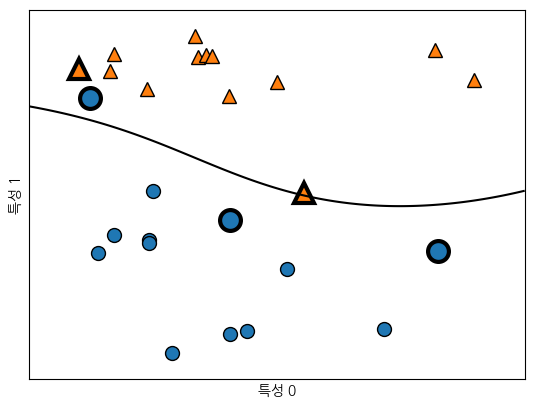

In [ ]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y) # 커널 RBF를 이해해야 한다 
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

#### SVM 매개변수 튜닝

SVM사용자로서 꼭 알아야 할 것들, ML.chang 2019. 7. 29. 12:20, https://championprogram.tistory.com/282

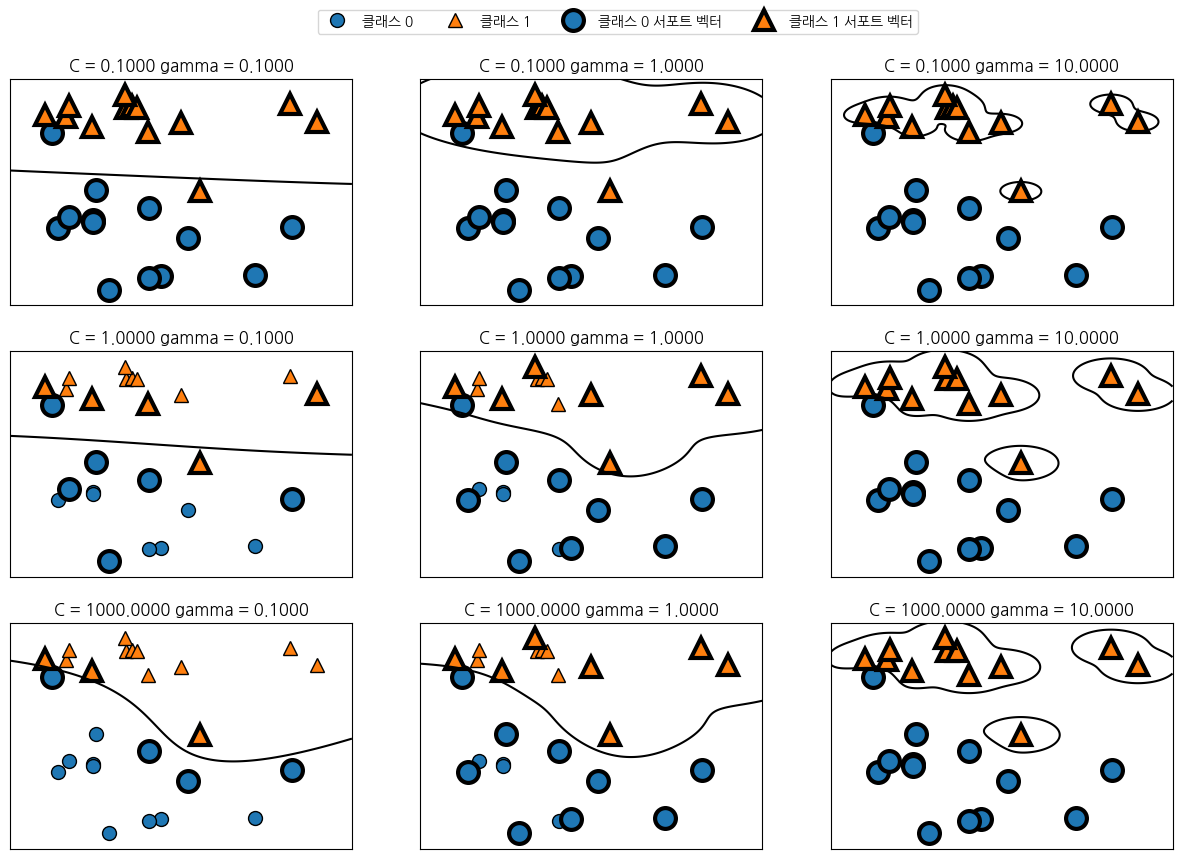

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                  ncol=4, loc=(.9, 1.2))
plt.show() # 책에는 없음

사이킷런 0.20 버전에서 `SVC` 클래스의 `gamma` 매개변수 옵션에 `auto`외에 `scale`이 추가되었습니다. `auto`는 `1/n_features`, 즉 특성 개수의 역수입니다. `scale`은 `1/(n_features * X.std())`로 스케일 조정이 되지 않은 특성에서 더 좋은 결과를 만듭니다. 사이킷런 0.22 버전부터는 `gamma` 매개변수의 기본값이 `auto`에서 `scale`로 변경됩니다. 서포트 벡터 머신을 사용하기 전에 특성을 표준화 전처리하면 `scale`과 `auto`는 차이가 없습니다.

In [ ]:
# RBF 커널 SVM을 유방암 데이터세트에 적용
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))
# 과소적합 결과

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


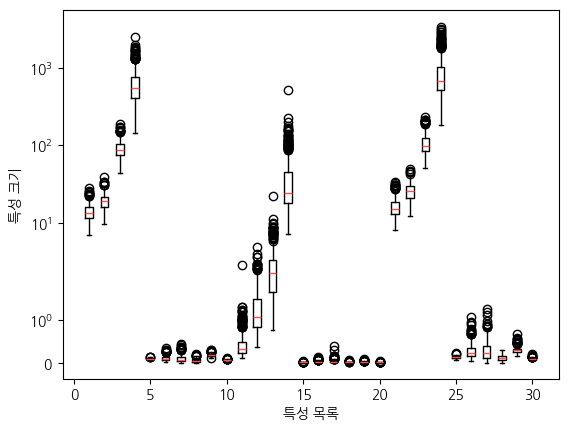

In [ ]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")
plt.show()

#### SVM 을 위한 데이터 전처리

In [ ]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다(자세한 내용은 3장에 있습니다)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.979
테스트 세트 정확도: 0.979


In [ ]:
svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.993
테스트 세트 정확도: 0.972


#### 장단점과 매개변수

### 2.3.9 신경망 (딥러닝)
#### 신경망 모델

## graphviz 에러 발생시 조치 방법
아래 링크에서 Graphviz 설치 프로그램 다운로드: ㅎㄱ메ㅗ퍜-12.2.0 EXE installer 다운로드 설치
🔗 https://graphviz.org/download/#windows

Windows 검색에서 "환경 변수 편집" → "시스템 환경 변수 편집" 열기

시스템 변수에서 Path 선택 → "편집"
C:\Program Files\Graphviz\bin

VSCode, Jupyter, Anaconda Prompt 등 모두 완전히 종료 후 재실행

cmd창: dot -V


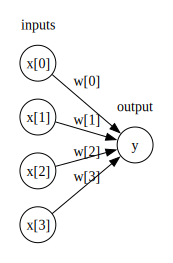

In [114]:
mglearn.plots.plot_logistic_regression_graph()

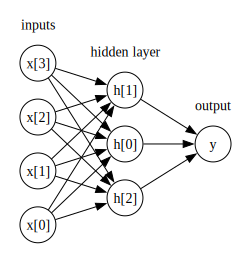

In [ ]:
mglearn.plots.plot_single_hidden_layer_graph()

[34편] 딥러닝의 기초 - 다층 퍼셉트론(Multi-Layer Perceptron;MLP), 옥수별, 17.6.18, https://m.blog.naver.com/samsjang/221030487369

In [113]:
import matplotlib.pyplot as plt

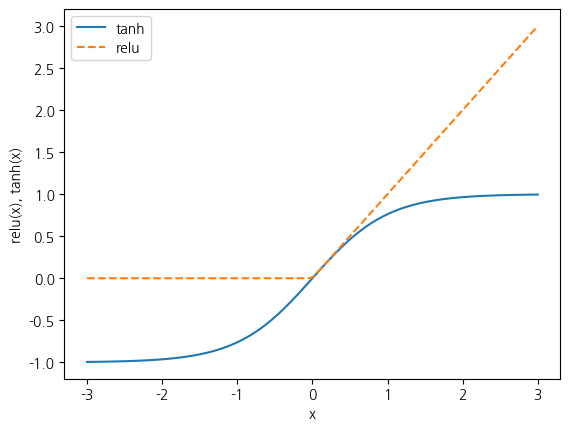

In [ ]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
plt.show() # 책에는 없음

3. 활성화 함수: 종류와 선택 기준 - 스터디노트, 위키독스, 24.6.14, https://wikidocs.net/250622

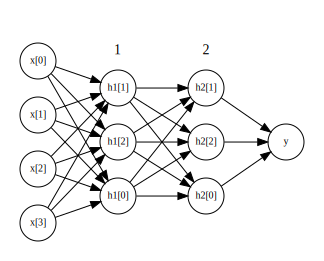

In [ ]:
mglearn.plots.plot_two_hidden_layer_graph()

#### 신경망 튜닝

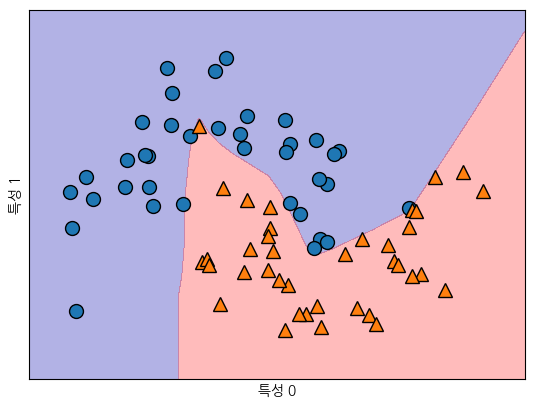

In [112]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train) # hidden layer의 units: 100개
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

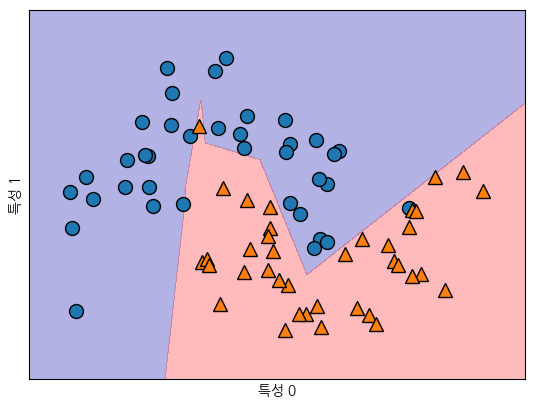

In [115]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], #hidden layer의 unit 숫자
                    max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

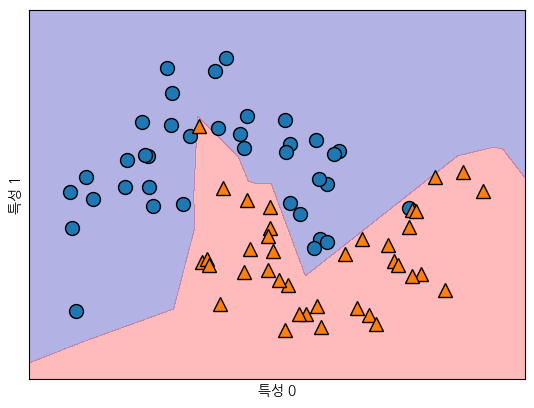

In [116]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10], max_iter=1000) # 은닉층을 추가 
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

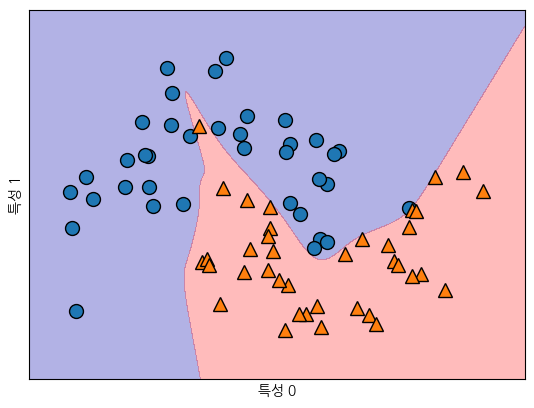

In [117]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh', #  활성화 함수 변경
                    random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

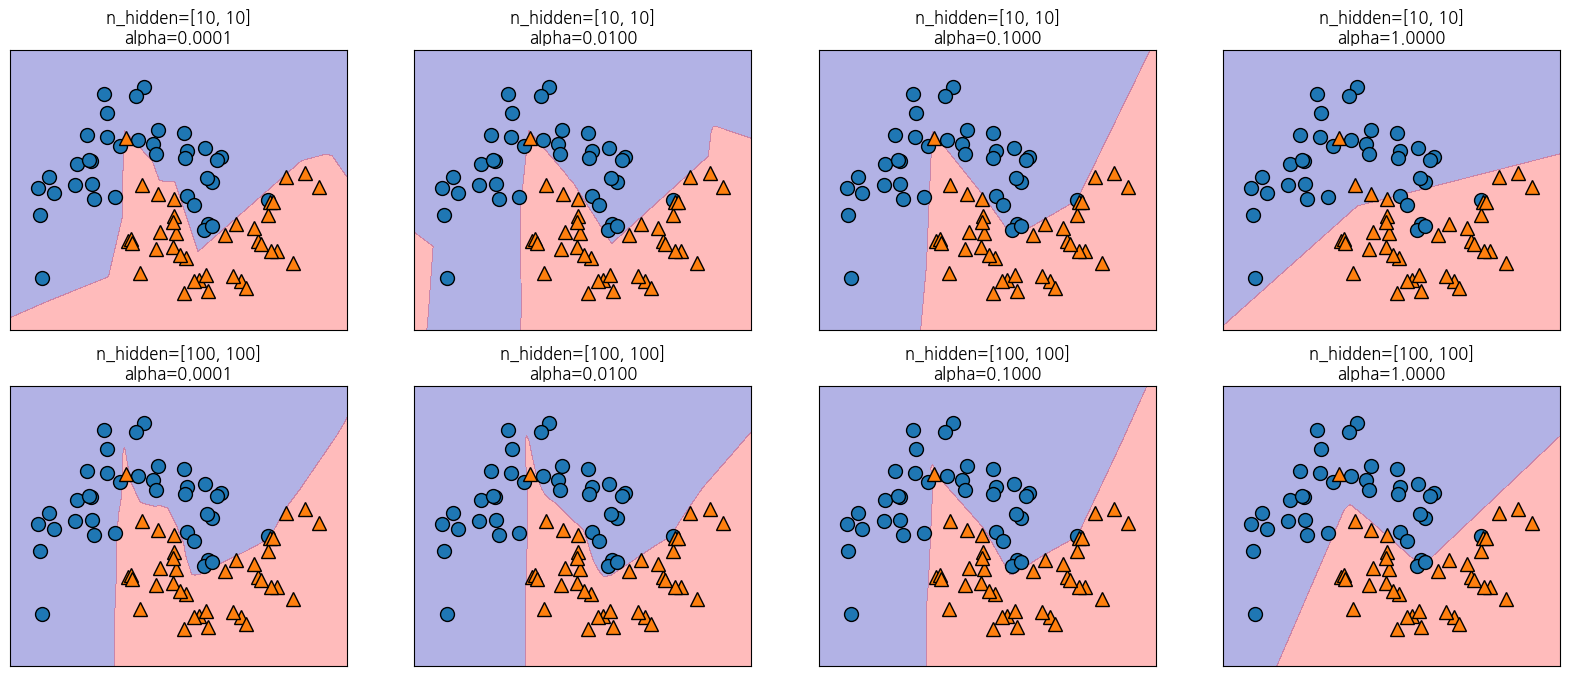

In [118]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha, max_iter=1000) # 알파값 > L2 규제항 적용 - penalty
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

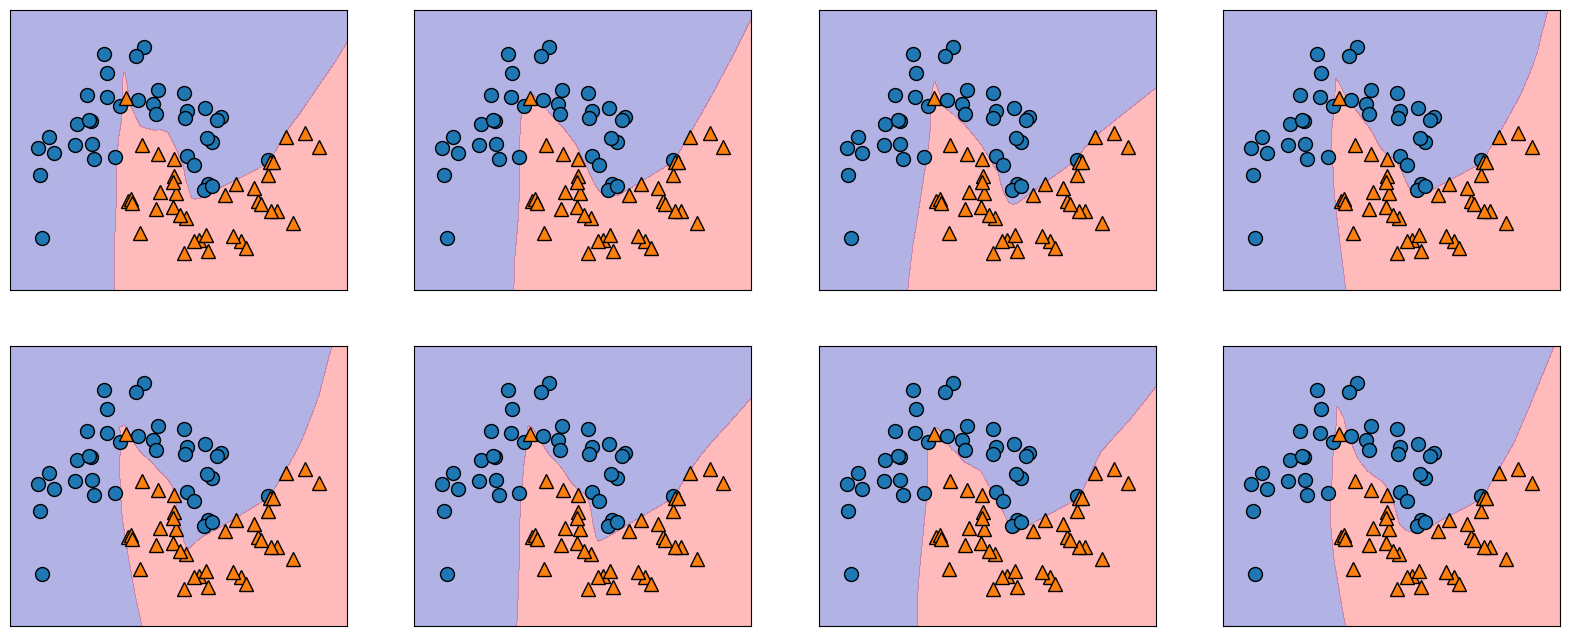

In [119]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, # 초기화를 달리한 모델
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [128]:
np.set_printoptions(precision=4, suppress=True)
print("유방암 데이터의 특성별 최대값:\n", cancer.data.max(axis=0))

유방암 데이터의 특성별 최대값:
 [  28.11     39.28    188.5    2501.        0.1634    0.3454    0.4268
    0.2012    0.304     0.0974    2.873     4.885    21.98    542.2
    0.0311    0.1354    0.396     0.0528    0.079     0.0298   36.04
   49.54    251.2    4254.        0.2226    1.058     1.252     0.291
    0.6638    0.2075]


In [133]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [134]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [137]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [138]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [139]:
mlp.coefs_[0].std(axis=1), mlp.coefs_[0].var(axis=1)

(array([0.0256, 0.0407, 0.0331, 0.0308, 0.0167, 0.0184, 0.0363, 0.0407,
        0.0243, 0.0174, 0.0551, 0.0166, 0.0401, 0.0368, 0.0132, 0.0341,
        0.0118, 0.0158, 0.0142, 0.0297, 0.0485, 0.0519, 0.0419, 0.0433,
        0.0319, 0.0148, 0.0407, 0.0486, 0.0375, 0.0263]),
 array([0.0007, 0.0017, 0.0011, 0.0009, 0.0003, 0.0003, 0.0013, 0.0017,
        0.0006, 0.0003, 0.003 , 0.0003, 0.0016, 0.0014, 0.0002, 0.0012,
        0.0001, 0.0002, 0.0002, 0.0009, 0.0024, 0.0027, 0.0018, 0.0019,
        0.001 , 0.0002, 0.0017, 0.0024, 0.0014, 0.0007]))

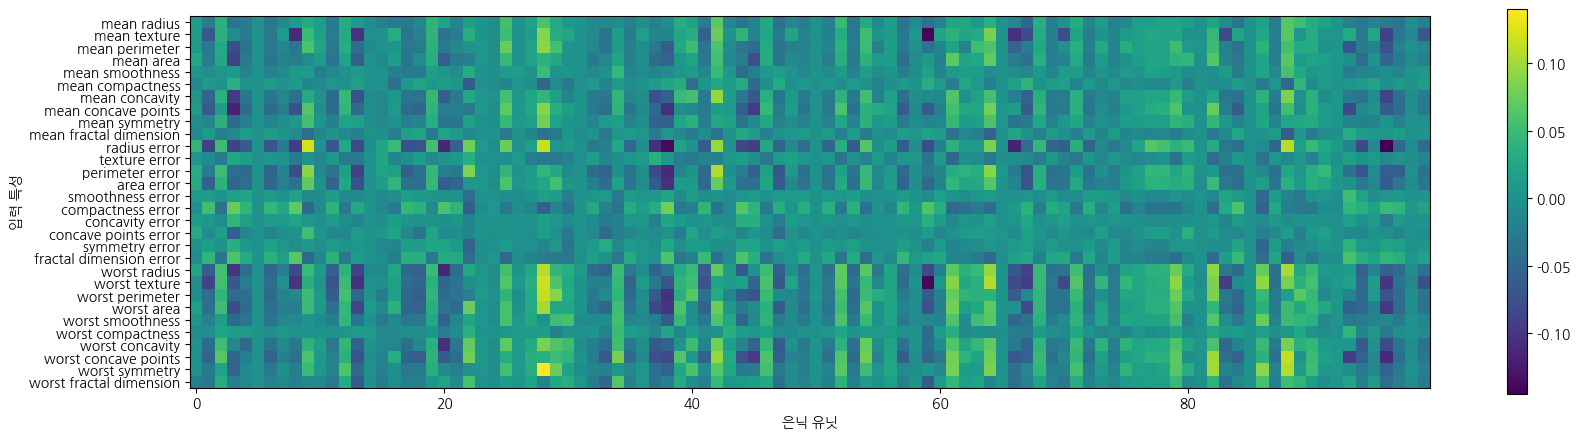

In [144]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()
plt.show() # 책에는 없음

교재 171페이지 보충:
- Adam, LBFGS, SGD는 모두 **딥러닝 모델의 손실 함수(loss function)를 최소화하기 위해 사용하는 최적화 알고리즘(optimizer)**

- 모두 경사하강법(Gradient Descent) 기반으로 모델의 가중치를 조금씩 바꿔가며 **손실(loss)**을 줄이는 방향으로 학습

-  SGD (Stochastic Gradient Descent): 전체 데이터가 아닌, 한 샘플 또는 미니배치 단위로 경사를 계산하고 업데이트

- Adam (Adaptive Moment Estimation): SGD + 모멘텀 + RMSprop 개념을 결합한 고급 최적화 알고리즘

- L-BFGS (Limited-memory BFGS): 고전적인 준-뉴턴법 기반 최적화, 소규모 문제에서는 빠르고 정확함

🎯 최적화 알고리즘이란?

    - 기계 학습 모델이 오차(비용)를 최소화하도록 학습을 도와주는 방법
    - 모델이 정답을 잘 맞히도록, 똑똑해지도록 만드는 길을 안내해주는 네비게이션 같은 개념
    - 기계학습 모델은 예측값 - 정답의 차이를 줄이기 위해 '비용 함수(cost function)' 또는 '손실함수(loss function)'를 정의함
    - 최적화 알고리즘은 이 함수의 최솟값을 찾아주는 역할

#### 장단점과 매개변수
#### 신경망의 복잡도 추정

## 2.4 분류 예측의 불확실성 추정

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름을 "blue" 와 "red" 로 바꿉니다
y_named = np.array(["blue", "red"])[y]

# 여러개의 배열을 한꺼번에 train_test_split 에 넣을 수 있습니다
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 그래디언트 부스팅 모델을 만듭니다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### 2.4.1 결정 함수

In [146]:
print("X_test.shape:", X_test.shape)
print("결정 함수 결과 형태:", gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [148]:
# 결정 함수 결과 중 앞부분 일부를 확인합니다
print("결정 함수:\n", gbrt.decision_function(X_test)[:6])

결정 함수:
 [ 4.1359 -1.7017 -3.9511 -3.6261  4.2899  3.6617]


In [147]:
print("임계치와 결정 함수 결과 비교:\n",
      gbrt.decision_function(X_test) > 0)
print("예측:\n", gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [150]:
# 불리언 값을 0과 1로 변환합니다
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스로 사용합니다
pred = gbrt.classes_[greater_zero]
# pred 와 gbrt.predict의 결과를 비교합니다
print("pred 는 예측 결과와 같다:",
      np.all(pred == gbrt.predict(X_test)))

pred 는 예측 결과와 같다: True


In [151]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최소값: {:.2f} 최대값: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

결정 함수 최소값: -7.69 최대값: 4.29


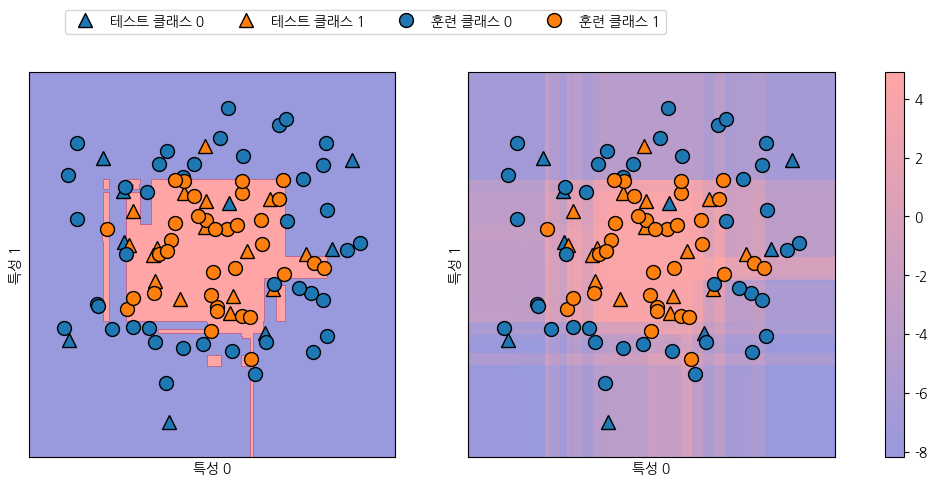

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
fig.draw_without_rendering()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))
plt.show() # 책에는 없음

### 2.4.2 예측 확률

In [153]:
print("확률 값의 형태:", gbrt.predict_proba(X_test).shape)

확률 값의 형태: (25, 2)


In [154]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("Predicted probabilities:\n",
      gbrt.predict_proba(X_test[:6]))

Predicted probabilities:
 [[0.0157 0.9843]
 [0.8458 0.1542]
 [0.9811 0.0189]
 [0.9741 0.0259]
 [0.0135 0.9865]
 [0.025  0.975 ]]


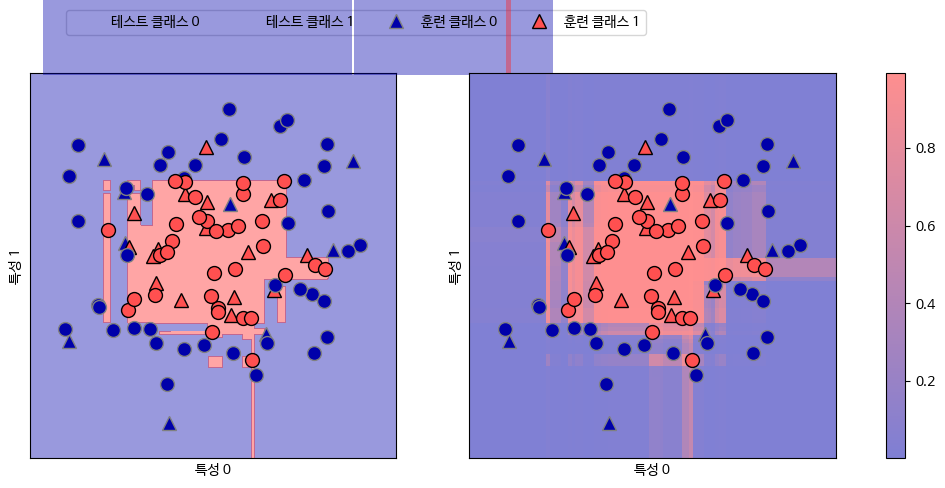

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
# colorbar 를 감추지 않습니다.
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
fig.draw_without_rendering()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))
plt.show() # 책에는 없음

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

### 2.4.3 다중 분류에서의 불확실성

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [ ]:
print("결정 함수의 결과 형태:", gbrt.decision_function(X_test).shape)
# decision function 결과 중 앞부분 일부를 확인합니다.
print("결정 함수 결과:\n", gbrt.decision_function(X_test)[:6, :])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-1.996  0.048 -1.927]
 [ 0.061 -1.908 -1.928]
 [-1.991 -1.876  0.097]
 [-1.996  0.048 -1.927]
 [-1.997 -0.135 -1.203]
 [ 0.061 -1.908 -1.928]]


In [ ]:
print("가장 큰 결정 함수의 인덱스:\n",
      np.argmax(gbrt.decision_function(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [ ]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("예측 확률:\n", gbrt.predict_proba(X_test)[:6])
# 행 방향으로 확률을 더하면 1 이 됩니다
print("합:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률:
 [[0.102 0.788 0.109]
 [0.783 0.109 0.107]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.104 0.667 0.229]
 [0.783 0.109 0.107]]
합: [1. 1. 1. 1. 1. 1.]


In [ ]:
print("가장 큰 예측 확률의 인덱스:\n",
      np.argmax(gbrt.predict_proba(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


사이킷런 0.20 버전에서 `LogisticRegression`의 `multi_class` 매개변수 옵션에 `auto`가 추가되었습니다. `auto`로 설정하면 이진 분류이거나 `solver`가 `liblinear`일 경우에는 `ovr`을 선택하고 그 외에는 `multinomial`을 선택합니다. 사이킷런 0.22 버전부터는 `multi_class` 매개변수의 기본값이 `ovr`에서 `auto`로 변경됩니다.

In [ ]:
logreg = LogisticRegression(max_iter=1000)

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류:", logreg.classes_)
print("예측:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스:", argmax_dec_func[:10])
print("인덱스를 classses_에 연결:",
      logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classses_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


## 2.5 요약 및 정리